## DIABETES PREDICTION MODEL 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, RocCurveDisplay)

## Loading the datasets

In [4]:
data = pd.read_csv(r"C:\Users\jvitt\OneDrive\Desktop\InternPe\Diabetes.csv")

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.shape

(768, 9)

## Data Analysis and Manipulation

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Summary statistics of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data['Outcome'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

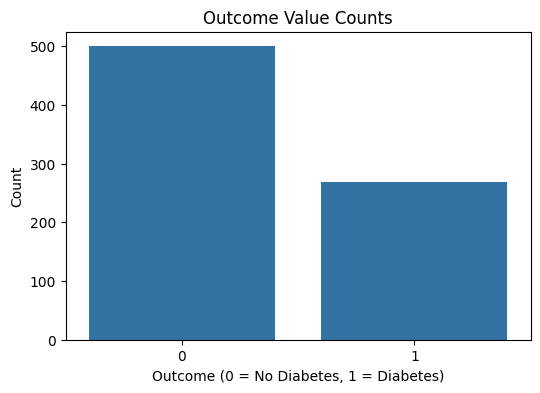

In [11]:
# Bar plot of Outcome value counts
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title('Outcome Value Counts')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

## FEATURE ENGINEERING

In [12]:
#Splitting features and labels
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled,X_test_scaled

(array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
          0.31079384, -0.79216928],
        [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
         -0.11643851,  0.56103382],
        [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
         -0.76486207, -0.70759409],
        ...,
        [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
         -0.78607218, -0.28471812],
        [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
         -1.01938346,  0.56103382],
        [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
         -0.57700104,  0.30730824]], shape=(614, 8)),
 array([[ 0.96054099,  1.20788789, -0.29601471, ..., -0.58221684,
         -0.55579092,  0.56103382],
        [ 1.86648903, -1.67775979,  1.98813468, ...,  0.44897876,
         -0.58306107,  1.15306018],
        [-0.5493724 ,  0.03460257,  0.3565994 , ...,  0.499902  ,
          0.01688223, -0.6230189 ],
        ...,
        [-0.5493724 , -1.23381399, -0.

## MODEL TRAINING

In [22]:
# logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [23]:
# Random Forest Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

## MODEL EVALUATION

In [28]:
# PREDICTION USING LOGISTIC REGRESSION
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]


In [26]:
# prediction using random forest model
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

In [29]:
# Comparing the model performance
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [30]:
# Evaluate both models
evaluate_model(y_test, y_pred_log_reg, y_prob_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

--- Logistic Regression ---
Accuracy: 0.7143
Precision: 0.6087
Recall: 0.5185
F1 Score: 0.5600
ROC AUC: 0.8230

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Confusion Matrix:
 [[82 18]
 [26 28]]


--- Random Forest ---
Accuracy: 0.7597
Precision: 0.6809
Recall: 0.5926
F1 Score: 0.6337
ROC AUC: 0.8118

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


Confusion Matrix:
 [[85 15]
 [22 32]]


<Figure size 1000x600 with 0 Axes>

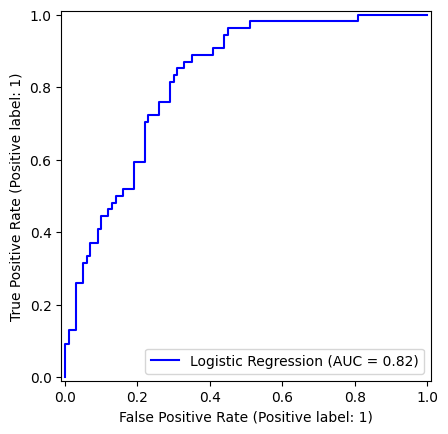

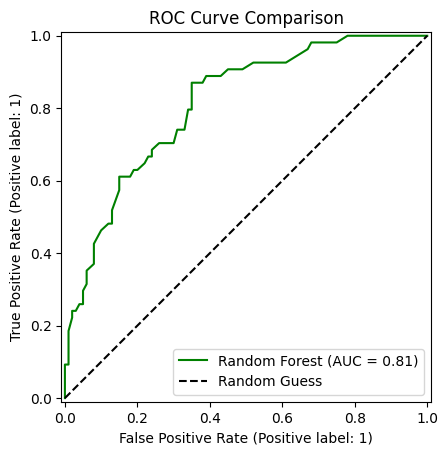

In [31]:
# Plot ROC Curves
plt.figure(figsize=(10,6))
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test, name="Logistic Regression", color="blue")
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, name="Random Forest", color="green")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()